In [2]:
import pandas as pd

In [3]:
Historical_Trader_Data=pd.read_csv('historical_data.csv')
Sentiment_Dataset=pd.read_csv('fear_greed_index.csv')

In [4]:
Historical_Trader_Data.head()

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp  
0     True  0.345404  8.950000e+14  1.730000e+12  
1     True  0.005600  4.430000e+14  1.730000e+12  
2     True  0.050431  6.600000e+14  1.730000e+12  
3     True  0.050043  1.080000e+15  1.730000e+12  
4     True  0.003055  1.050000e+15  1.730000e+12

In [5]:
Sentiment_Dataset.head()

timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

In [6]:
Historical_Trader_Data.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [7]:
Historical_Trader_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [8]:
Historical_Trader_Data['Timestamp IST']=pd.to_datetime(Historical_Trader_Data['Timestamp IST'])

In [9]:
Sentiment_Dataset.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [10]:
Sentiment_Dataset['date']=pd.to_datetime(Sentiment_Dataset['date'])

In [11]:
Sentiment_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [12]:
Sentiment_Dataset['classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Sentiment_Dataset['classification']=le.fit_transform(Sentiment_Dataset['classification'])

In [14]:
Sentiment_Dataset.head()

timestamp  value  classification       date
0  1517463000     30               2 2018-02-01
1  1517549400     15               0 2018-02-02
2  1517635800     40               2 2018-02-03
3  1517722200     24               0 2018-02-04
4  1517808600     11               0 2018-02-05

In [15]:
Historical_Trader_Data['date']=Historical_Trader_Data['Timestamp IST'].dt.date

In [16]:
Historical_Trader_Data['date']=pd.to_datetime(Historical_Trader_Data['date'])

In [17]:
Historical_Trader_Data.head()

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp       date  
0     True  0.345404  8.950000e+14  1.730000e+12 2024-02-12  
1     True  0.005600  4.430000e+14  1.730000e+12 2024-02-12  
2     True  0.050431  6.600000e+14  1.730000e+12 2024-02-12  
3     True  0.050043  1.080000e+15  1.730000e+12 2024-02-12  
4     True  0.003055  1.050000e+15  1.730000e+12 2024-02-12

In [18]:
merged_data=pd.merge(Historical_Trader_Data,Sentiment_Dataset,on='date',how='inner')

In [19]:
merged_data.head()

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp       date   timestamp  \
0     True  0.345404  8.950000e+14  1.730000e+12 2024-02-12  1707715800   
1     True  0.005600  4.430000e+14  1.730000e+12 2024-02-12  1707715800   
2     True  0.050431  6.600000e+14  1.730000e+12 2024-02-12  1707715800   
3     True  0.050043  1.080000e+15  1.730000e+12 2024-02-12  1707715800   
4     True  0.003055  1.050000e+15  1.730000e+12 2024-02-12  1707715800   

   value  classification  
0     70               3  
1     70               3  
2     70               3  
3     70               3  
4     70               3

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
merged_data['classification'].unique()

array([3, 1, 2, 4, 0])

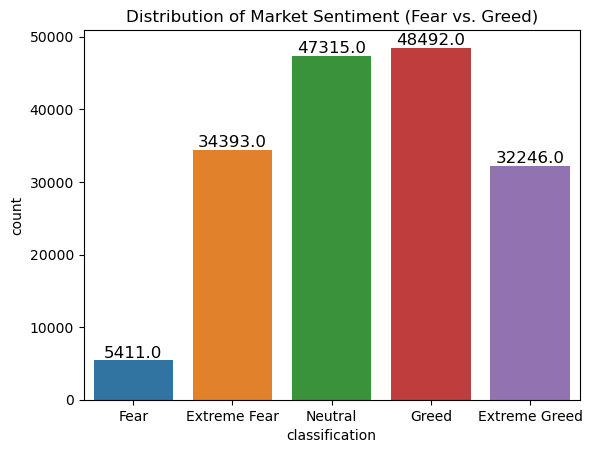

In [43]:
ax=sns.countplot(x='classification', data=merged_data)
plt.title("Distribution of Market Sentiment (Fear vs. Greed)")
ax.set_xticklabels(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.show()

In [33]:
avg_pnl_by_sentiment = merged_data.groupby('classification')['Closed PnL'].mean()
print("\nAverage Trader PnL by Sentiment (0 = Fear, 1 = Extreme Fear, 2 = Neutral, 3 = Greed, 4 = Extreme Greed):")
print(pd.DataFrame(avg_pnl_by_sentiment))


Average Trader PnL by Sentiment (0 = Fear, 1 = Extreme Fear, 2 = Neutral, 3 = Greed, 4 = Extreme Greed):
                Closed PnL
classification            
0                47.446302
1                73.144030
2                56.544720
3                35.652184
4                31.746470


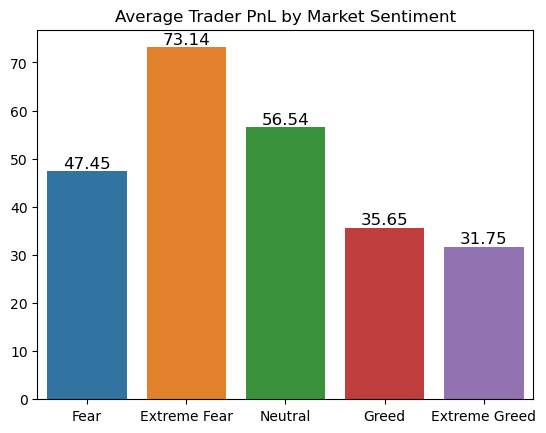

In [40]:
ax=sns.barplot(x=['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'], y=avg_pnl_by_sentiment.values)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=12, color='black')
plt.title("Average Trader PnL by Market Sentiment")
plt.show()

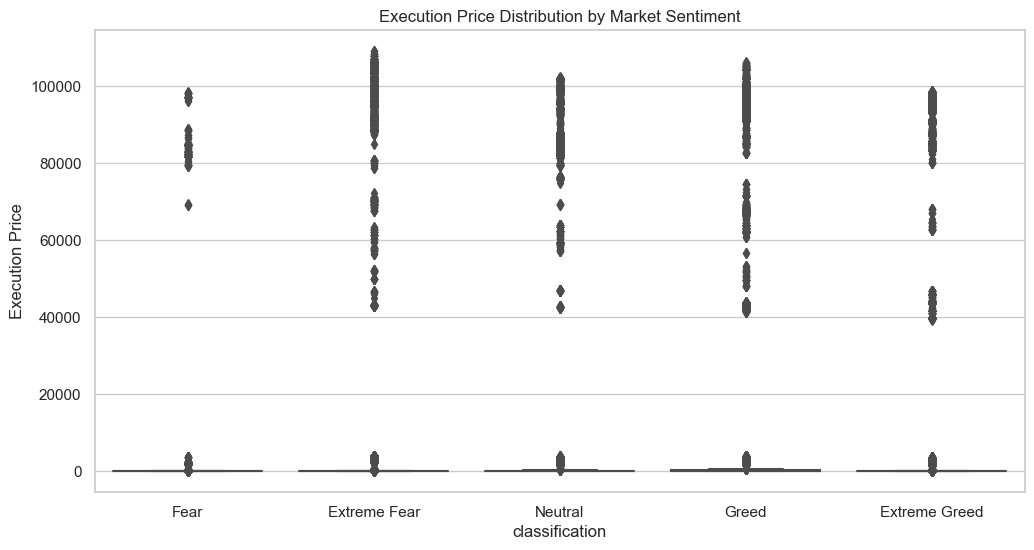

In [60]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.boxplot(x='classification', y='Execution Price', data=merged_data)

# Customizing x-tick labels for better readability
ax.set_xticklabels(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title("Execution Price Distribution by Market Sentiment")
plt.show()


In [56]:
# Importing necessary library
import scipy.stats as stats

# Separating PnL values by sentiment
fear_pnl = merged_data[merged_data['classification'] == 0]['Closed PnL']
extreme_fear_pn1 = merged_data[merged_data['classification'] == 1]['Closed PnL']
neutral_pn1 = merged_data[merged_data['classification'] == 2]['Closed PnL']
greed_pnl = merged_data[merged_data['classification'] == 3]['Closed PnL']
extreme_greed_pn1 = merged_data[merged_data['classification'] == 4]['Closed PnL']

# Performing pairwise t-tests
results = {}

# Comparing each pair of categories
categories = {
    "Fear": fear_pnl,
    "Extreme Fear": extreme_fear_pn1,
    "Neutral": neutral_pn1,
    "Greed": greed_pnl,
    "Extreme Greed": extreme_greed_pn1
}

# Performing pairwise t-tests
for cat1 in categories:
    for cat2 in categories:
        if cat1 != cat2:
            t_stat, p_value = stats.ttest_ind(categories[cat1], categories[cat2], equal_var=False)
            results[f"{cat1} vs {cat2}"] = (t_stat, p_value)

# Displaying results
print("\nPairwise T-Test Results (T-Statistic, P-Value):")
for comparison, result in results.items():
    print(f"{comparison}: T-Stat = {result[0]:.4f}, P-Value = {result[1]:.4f}")



Pairwise T-Test Results (T-Statistic, P-Value):
Fear vs Extreme Fear: T-Stat = -1.0902, P-Value = 0.2757
Fear vs Neutral: T-Stat = -0.3890, P-Value = 0.6973
Fear vs Greed: T-Stat = 0.5026, P-Value = 0.6153
Fear vs Extreme Greed: T-Stat = 0.6779, P-Value = 0.4979
Extreme Fear vs Fear: T-Stat = 1.0902, P-Value = 0.2757
Extreme Fear vs Neutral: T-Stat = 2.7028, P-Value = 0.0069
Extreme Fear vs Greed: T-Stat = 5.8431, P-Value = 0.0000
Extreme Fear vs Extreme Greed: T-Stat = 7.9771, P-Value = 0.0000
Neutral vs Fear: T-Stat = 0.3890, P-Value = 0.6973
Neutral vs Extreme Fear: T-Stat = -2.7028, P-Value = 0.0069
Neutral vs Greed: T-Stat = 3.6502, P-Value = 0.0003
Neutral vs Extreme Greed: T-Stat = 5.7623, P-Value = 0.0000
Greed vs Fear: T-Stat = -0.5026, P-Value = 0.6153
Greed vs Extreme Fear: T-Stat = -5.8431, P-Value = 0.0000
Greed vs Neutral: T-Stat = -3.6502, P-Value = 0.0003
Greed vs Extreme Greed: T-Stat = 0.8332, P-Value = 0.4047
Extreme Greed vs Fear: T-Stat = -0.6779, P-Value = 0.4979

In [57]:
print("\nInsights:")

# Sorting sentiment by average PnL (descending order)
sorted_sentiments = avg_pnl_by_sentiment.sort_values(ascending=False)
best_sentiment = sorted_sentiments.index[0]
worst_sentiment = sorted_sentiments.index[-1]

# Mapping classification values to labels
sentiment_labels = {0: "Fear", 1: "Extreme Fear", 2: "Neutral", 3: "Greed", 4: "Extreme Greed"}

# Displaying average PnL for each sentiment
for sentiment, pnl in sorted_sentiments.items():
    print(f"Average PnL during {sentiment_labels[sentiment]}: {pnl:.2f}")

# Highlighting best and worst performing sentiment
print(f"\nTraders perform best during '{sentiment_labels[best_sentiment]}' market sentiment.")
print(f"Traders perform worst during '{sentiment_labels[worst_sentiment]}' market sentiment.")

# Recommendations based on analysis
print("\nRecommendations:")
print(f"1. Monitor market sentiment to optimize trading strategies. Prioritize strategies for '{sentiment_labels[best_sentiment]}' as it has the best performance.")
print(f"2. Exercise caution during '{sentiment_labels[worst_sentiment]}' as it shows the worst performance.")
print(f"3. Consider using lower leverage during '{sentiment_labels[worst_sentiment]}' to minimize losses.")



Insights:
Average PnL during Extreme Fear: 73.14
Average PnL during Neutral: 56.54
Average PnL during Fear: 47.45
Average PnL during Greed: 35.65
Average PnL during Extreme Greed: 31.75

Traders perform best during 'Extreme Fear' market sentiment.
Traders perform worst during 'Extreme Greed' market sentiment.

Recommendations:
1. Monitor market sentiment to optimize trading strategies. Prioritize strategies for 'Extreme Fear' as it has the best performance.
2. Exercise caution during 'Extreme Greed' as it shows the worst performance.
3. Consider using lower leverage during 'Extreme Greed' to minimize losses.
